# PPProjecct

In [1]:
!pip install probaforms -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 36.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu121
    Uninstalling torch-2.1.0+cu121:
      Successfully uninstalled torch-2.1.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.13.1 

## Data

In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train_cache.csv')
train.head()

,iops,lat,block_size,n_jobs,iodepth,read_fraction,load_type,io_type,raid,n_disks,device_type,offset,id
0,712511,386627.74,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769
1,709311,388112.33,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769
2,712464,386384.72,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769
3,711226,387053.72,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769
4,710919,387191.78,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769


In [4]:
test = pd.read_csv('test_cache.csv')
test.head()

,iops,lat,block_size,n_jobs,iodepth,read_fraction,load_type,io_type,raid,n_disks,device_type,offset,id
0,21483,613944.00,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065
1,21354,610190.00,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065
2,20883,613910.75,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065
3,21493,610052.62,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065
4,21473,606866.62,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065


In [5]:
pd.unique(train[['block_size']]. values.ravel())

array([  8,  16,  32,  64, 256,   4, 128])

In [6]:
pd.unique(train[['n_jobs']]. values.ravel()).size

32

In [7]:
pd.unique(train[['iodepth']]. values.ravel()).size

16

In [8]:
pd.unique(train[['read_fraction']]. values.ravel()).size

101

In [9]:
pd.unique(train[['io_type']]. values.ravel())

array(['read', 'write'], dtype=object)

In [10]:
pd.unique(train[['id']]. values.ravel()).size

408

In [11]:
test['id'] = test['id'] + '-' + test['io_type']

In [12]:
test['io_type_num'] = test['io_type'] == 'write'

In [13]:
test.io_type_num = test.io_type_num.replace({ True : 1 , False : 0 })

In [14]:
y_test = torch.tensor(test[['iops', 'lat']].values)

In [15]:
X_test = torch.tensor(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

In [16]:
print(len(y_test), len(X_test))

12120 12120


In [17]:
train['id'] = train['id'] + '-' + train['io_type']

In [18]:
train['io_type_num'] = train['io_type'] == 'write'

In [19]:
train.io_type_num = train.io_type_num.replace({ True : 1 , False : 0 })

In [20]:
y_tr = torch.tensor(train[['iops', 'lat']].values)

In [21]:
X_tr = torch.tensor(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

In [22]:
pd.unique(train[['id']]. values.ravel())

array(['hse-09142022-013313-z3769-read',
       'hse-09132022-220621-z47654-read',
       'hse-09132022-220621-z47654-write',
       'hse-09132022-145656-z44664-read',
       'hse-09132022-145656-z44664-write',
       'hse-09132022-114106-z26207-read',
       'hse-09132022-114106-z26207-write',
       'hse-09132022-193036-z66798-read',
       'hse-09132022-193036-z66798-write',
       'hse-09132022-144055-z72468-read',
       'hse-09132022-144055-z72468-write',
       'hse-09132022-204254-z78794-read',
       'hse-09132022-204254-z78794-write',
       'hse-09132022-225919-z97534-read',
       'hse-09132022-225919-z97534-write',
       'hse-09132022-231343-z49201-read',
       'hse-09132022-231343-z49201-write',
       'hse-09142022-005311-z97289-read',
       'hse-09142022-005311-z97289-write',
       'hse-09132022-181650-z73563-read',
       'hse-09132022-181650-z73563-write',
       'hse-09132022-183252-z8604-read',
       'hse-09132022-183252-z8604-write',
       'hse-09132022-23120

In [23]:
pd.unique(test[['id']]. values.ravel())

array(['hse-09132022-180712-z63065-read',
       'hse-09132022-180712-z63065-write',
       'hse-09132022-212616-z36709-read',
       'hse-09132022-212616-z36709-write',
       'hse-09132022-203942-z36542-read',
       'hse-09132022-203942-z36542-write',
       'hse-09132022-113615-z47578-read',
       'hse-09132022-113615-z47578-write',
       'hse-09132022-113127-z92275-read',
       'hse-09132022-113127-z92275-write',
       'hse-09132022-202959-z97080-read',
       'hse-09132022-202959-z97080-write',
       'hse-09132022-130756-z72964-read',
       'hse-09132022-130756-z72964-write',
       'hse-09132022-152621-z23474-read',
       'hse-09132022-152621-z23474-write',
       'hse-09132022-222402-z67880-read',
       'hse-09132022-222402-z67880-write',
       'hse-09142022-002727-z41754-read',
       'hse-09142022-002727-z41754-write',
       'hse-09132022-215503-z42747-read',
       'hse-09132022-215503-z42747-write',
       'hse-09132022-154850-z69269-read',
       'hse-09132022-15

In [24]:
# id + "read" or "write" done

## Outliers

using z-score

In [183]:
new_train = pd.DataFrame()

In [184]:
from scipy import stats

In [185]:
for idd in pd.unique(train[['id']]. values.ravel()):
    arr = train[train['id'] == idd]
    z = stats.zscore(arr[['iops', 'lat']])
    z_mask = (np.abs(z) < 3).all(axis = 1)
    arr_z = arr[z_mask]
    new_train = pd.concat([new_train, arr_z], ignore_index=True)

In [186]:
print(len(train))
print(len(new_train))

48480
47458


In [187]:
new_test = pd.DataFrame()

In [188]:
for idd in pd.unique(test[['id']]. values.ravel()):
    arr = test[test['id'] == idd]
    z = stats.zscore(arr[['iops', 'lat']])
    z_mask = (np.abs(z) < 3).all(axis = 1)
    arr_z = arr[z_mask]
    new_test = pd.concat([new_test, arr_z], ignore_index=True)

In [189]:
print(len(test))
print(len(new_test))

12120
11867


## Scalers

In [156]:
from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np
from dataclasses import dataclass

# from https://github.com/HEPML-AnomalyDetection/CATHODE/blob/4e96989296193da18508710afbfa3b37fffe5952/data_handler.py
def logit_transform_inverse(data, datamin, datamax):
    dataout = (datamin + datamax*np.exp(data))/(1 + np.exp(data))
    return dataout

def quick_logit(x, x_min, x_max, eps):
    x_norm = (x-x_min)/(x_max-x_min)
    x_norm = x_norm[((x_norm != 0) & (x_norm != 1)).all(axis=1)]
    x_norm[x_norm == 0] += eps
    x_norm[x_norm == 1] -= eps
    logit = np.log(x_norm/(1-x_norm))
    logit = logit[~np.isnan(logit).any(axis=1)]
    return logit

class LogitScaler(TransformerMixin, BaseEstimator):

    def __init__(self, eps=1e-6):
        super().__init__()
        self.eps = eps
        self.x_max = None
        self.x_min = None

    def fit(self, X, y=None):
        self.x_min = np.min(X, axis=0) - self.eps
        self.x_max = np.max(X, axis=0) + self.eps
        return self

    def transform(self, X):
        return quick_logit(X, self.x_min, self.x_max, self.eps)

    def inverse_transform(self, X):
        return logit_transform_inverse(X, self.x_min, self.x_max)

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = make_pipeline(LogitScaler(eps=0.1), StandardScaler())

In [158]:
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
y_test_ss = scaler.transform(test[['iops', 'lat']].values)

<ipython-input-156-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


In [159]:
stscaler = StandardScaler()

In [160]:
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

## Graphs

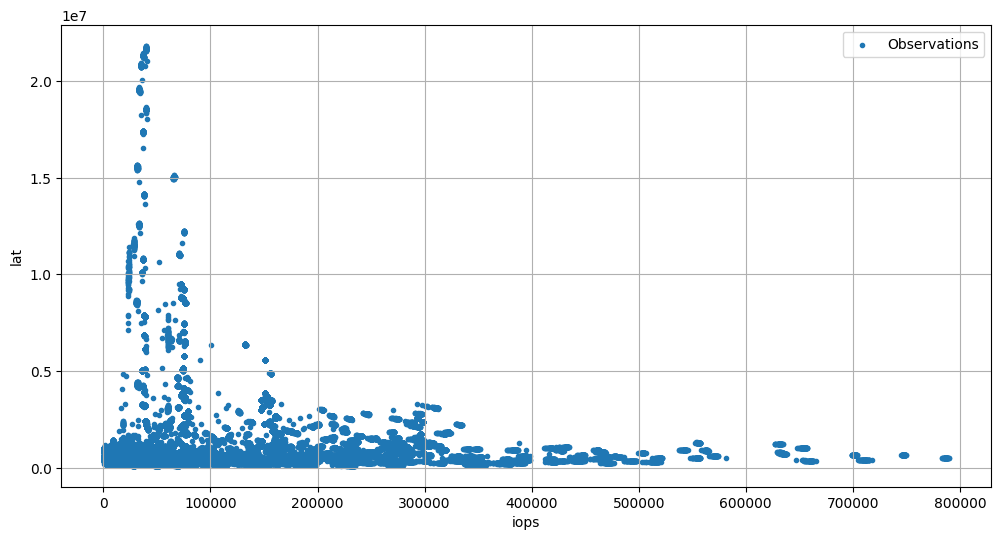

In [32]:
plt.figure(figsize=(12, 6))
plt.scatter(y_tr[:, 0], y_tr[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

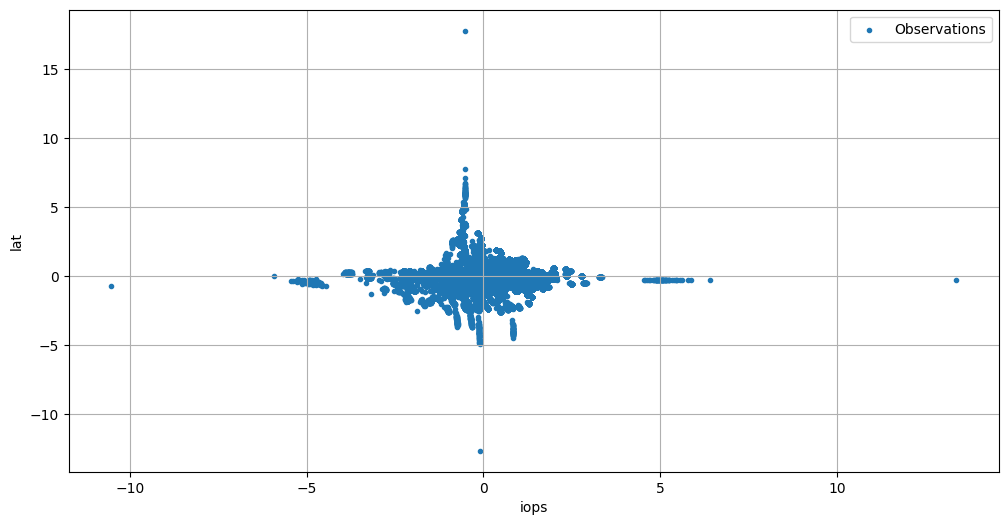

In [35]:
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = torch.tensor(scaler.fit_transform(train[['iops', 'lat']].values))

plt.figure(figsize=(12, 6))
plt.scatter(y_tr_ss[:, 0], y_tr_ss[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

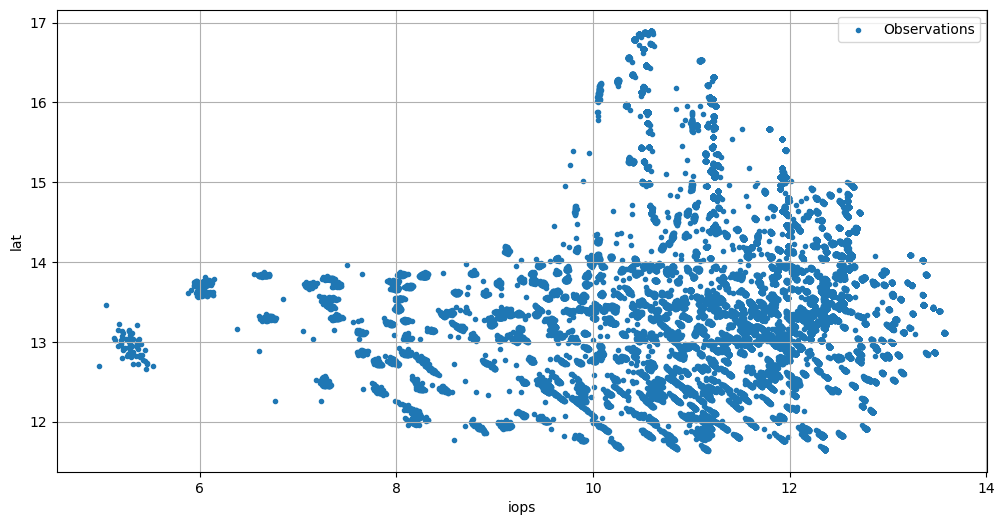

In [36]:
y_tr_ss = torch.tensor(np.log(train[['iops', 'lat']].values))

plt.figure(figsize=(12, 6))
plt.scatter(y_tr_ss[:, 0], y_tr_ss[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

## Graphs without outliers

In [190]:
y_tr_w = torch.tensor(new_train[['iops', 'lat']].values)

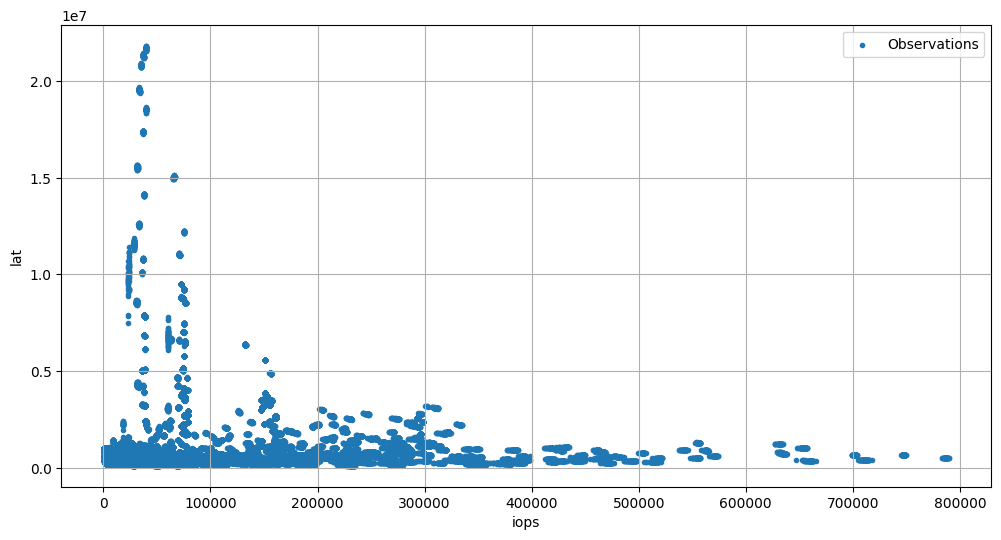

In [191]:
plt.figure(figsize=(12, 6))
plt.scatter(y_tr_w[:, 0], y_tr_w[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

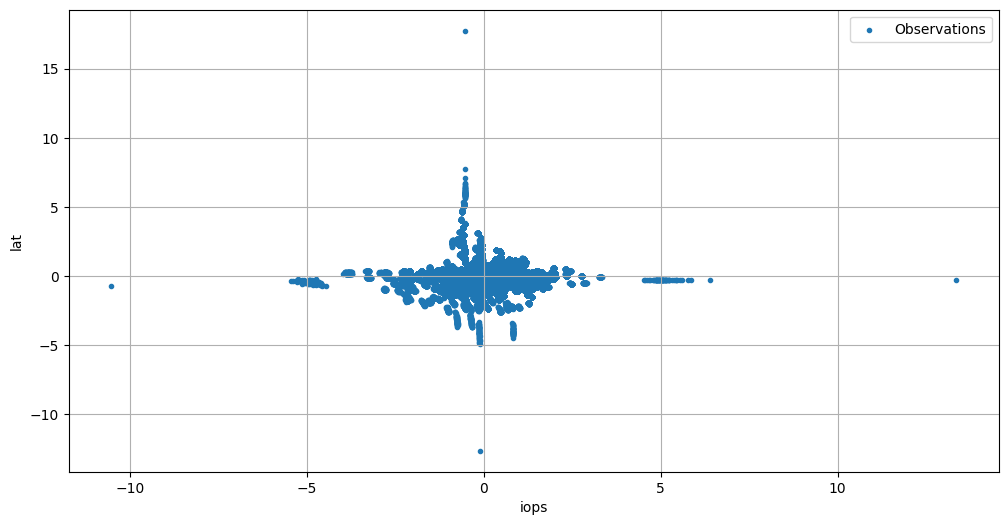

In [192]:
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = torch.tensor(scaler.fit_transform(new_train[['iops', 'lat']].values))

plt.figure(figsize=(12, 6))
plt.scatter(y_tr_ss[:, 0], y_tr_ss[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

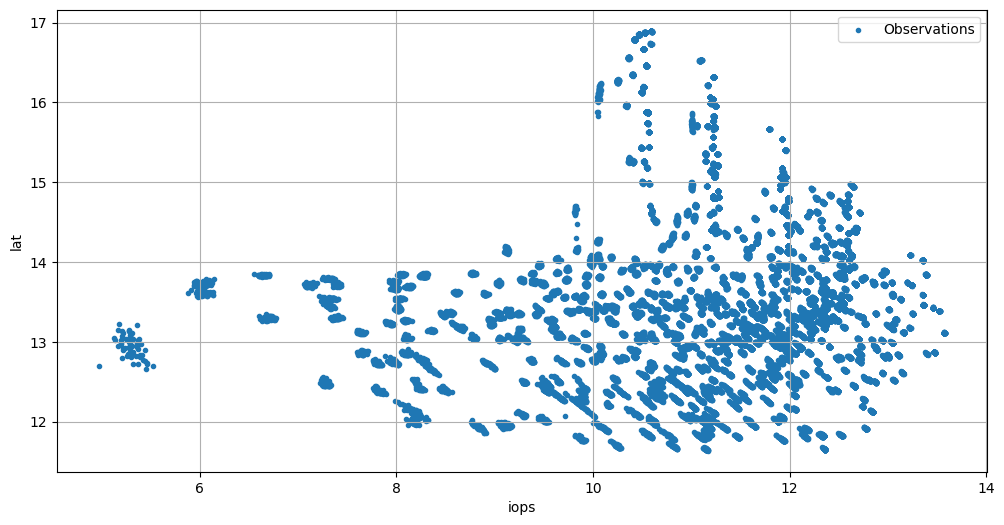

In [193]:
y_tr_ss = torch.tensor(np.log(new_train[['iops', 'lat']].values))

plt.figure(figsize=(12, 6))
plt.scatter(y_tr_ss[:, 0], y_tr_ss[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

## Final experiments

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from probaforms.models import RealNVP
from probaforms import metrics

In [38]:
train = train
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
# y_test_ss = scaler.transform(test[['iops', 'lat']].values)
stscaler = StandardScaler()
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
# X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

model = RealNVP(lr=0.001, n_layers=12, n_epochs=200, batch_size=64) # 200
model.fit(y_tr_ss, X_tr_ss) # (target, condition)

In [40]:
def calc_metrics(X, Y):
    mu, sigma = metrics.frechet_distance(X, Y)
    print(r"Frechet Distance         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kolmogorov_smirnov_1d(X, Y)
    print(r"Kolmogorov-Smirnov       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.cramer_von_mises_1d(X, Y)
    print(r"Cramer-von Mises         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.anderson_darling_1d(X, Y)
    print(r"Anderson-Darling         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.roc_auc_score_1d(X, Y)
    print(r"ROC AUC                  = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kullback_leibler_1d_kde(X, Y)
    print(r"Kullback-Leibler KDE     = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.jensen_shannon_1d_kde(X, Y)
    print(r"Jensen-Shannon KDE       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.maximum_mean_discrepancy(X, Y)
    print(r"Maximum Mean Discrepancy = %.4f +- %.4f" % (mu, sigma))

### RESULTS (TRAIN)

In [85]:
from torch.utils.data import TensorDataset, DataLoader

In [86]:
ids = ['hse-09132022-234723-z24647-read', 'hse-09132022-155203-z5570-read',
       'hse-09132022-234723-z24647-write', 'hse-09132022-155203-z5570-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_train = torch.tensor(train[train['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_train[:, 0])
    total_lat.append(y_train[:, 1])
    X_train = torch.tensor(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_train_ss = scaler.transform(y_train)
    X_train_ss = stscaler.transform(X_train)
    y_tst = torch.tensor(y_train_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_train_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    y_gen = model.sample(stscaler.transform(X_train.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

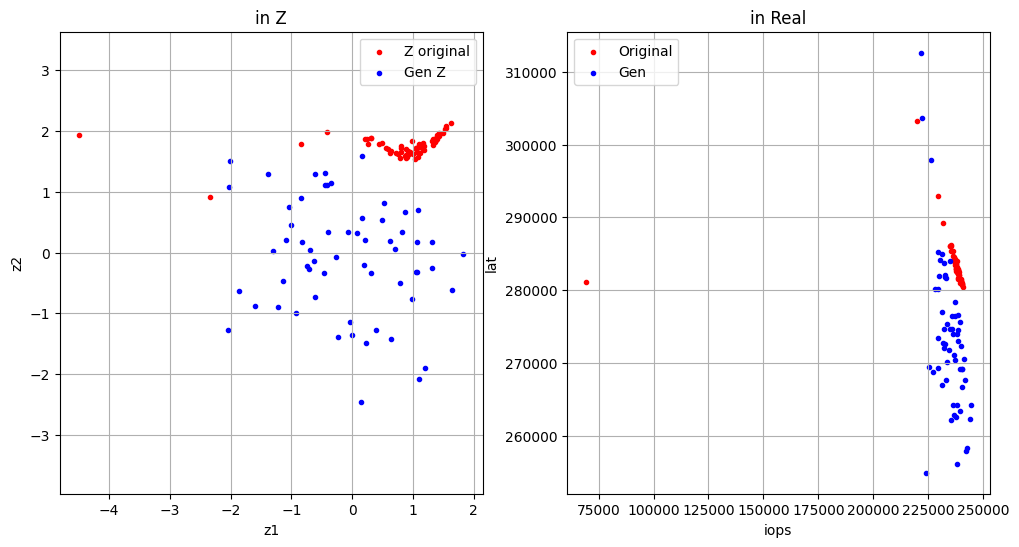

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [115]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [116]:
print('In Z:')
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In Z:
Frechet Distance         = 7.8037 +- 0.6120
Kolmogorov-Smirnov       = 0.6708 +- 0.0289
Cramer-von Mises         = 5.5546 +- 0.2033
Anderson-Darling         = 35.0295 +- 1.2299
ROC AUC                  = 0.7717 +- 0.0194
Kullback-Leibler KDE     = 1.8970 +- 0.3706
Jensen-Shannon KDE       = 0.3222 +- 0.0194
Maximum Mean Discrepancy = 0.8053 +- 0.0493


In [117]:
# arr1 = np.array([[el] for el in np.array(total_iops[0])])
# arr2 = np.array([[el] for el in np.array(total_lat[0])])
# arr3 = np.array([[el] for el in np.array(gen_iops[0])])
# arr4 = np.array([[el] for el in np.array(gen_lat[0])])

In [119]:
# print('In Real:')
# calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

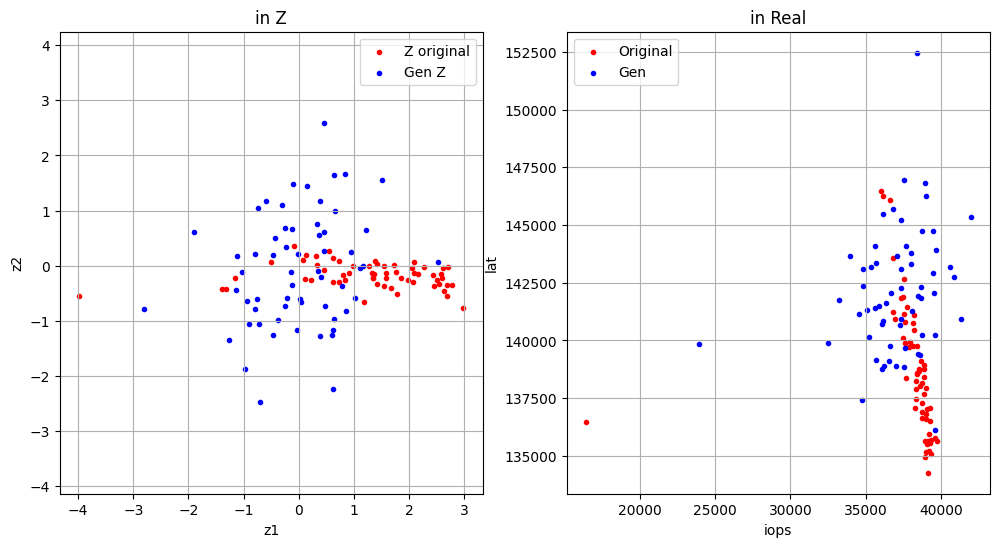

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [91]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [92]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 2.4596 +- 0.4170
Kolmogorov-Smirnov       = 0.5171 +- 0.0382
Cramer-von Mises         = 2.9292 +- 0.4820
Anderson-Darling         = 20.4816 +- 3.2135
ROC AUC                  = 0.6885 +- 0.0272
Kullback-Leibler KDE     = 0.7569 +- 0.2350
Jensen-Shannon KDE       = 0.1423 +- 0.0242
Maximum Mean Discrepancy = 0.3188 +- 0.0640


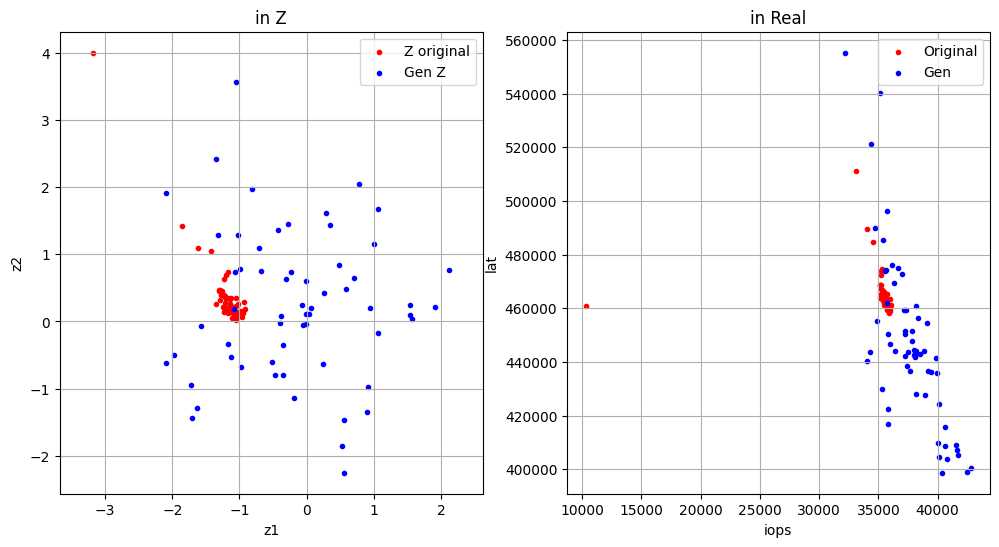

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [94]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [95]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 2.3418 +- 0.3578
Kolmogorov-Smirnov       = 0.5679 +- 0.0425
Cramer-von Mises         = 3.0463 +- 0.4854
Anderson-Darling         = 20.4742 +- 2.4875
ROC AUC                  = 0.6908 +- 0.0347
Kullback-Leibler KDE     = 0.5605 +- 0.0612
Jensen-Shannon KDE       = 0.1599 +- 0.0147
Maximum Mean Discrepancy = 0.4022 +- 0.0491


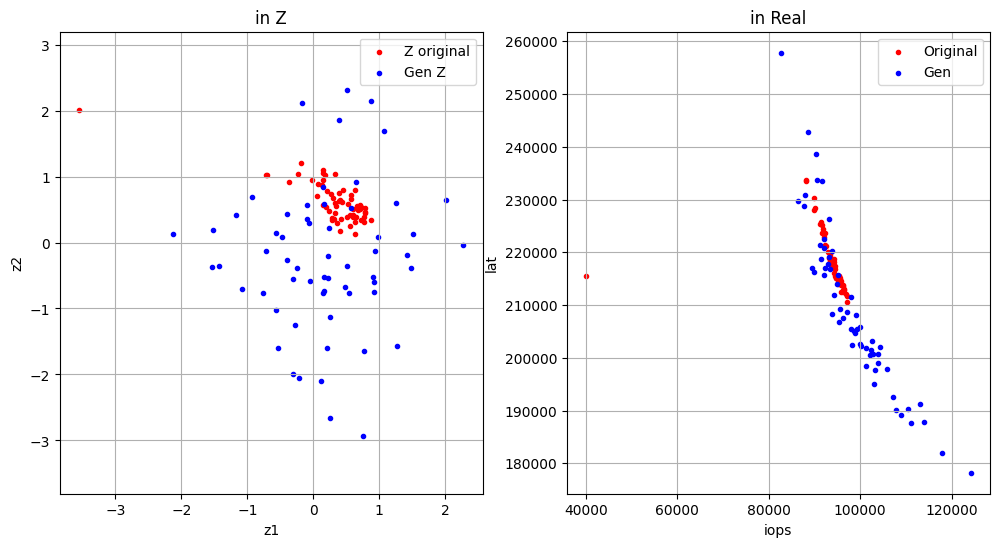

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [97]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [98]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.7702 +- 0.3167
Kolmogorov-Smirnov       = 0.5229 +- 0.0488
Cramer-von Mises         = 2.9771 +- 0.5630
Anderson-Darling         = 18.1006 +- 2.7009
ROC AUC                  = 0.7024 +- 0.0326
Kullback-Leibler KDE     = 0.4790 +- 0.0689
Jensen-Shannon KDE       = 0.1256 +- 0.0170
Maximum Mean Discrepancy = 0.3418 +- 0.0560


### RESULTS (TEST)

In [99]:
from torch.utils.data import TensorDataset, DataLoader

In [100]:
ids = ['hse-09132022-203942-z36542-read', 'hse-09132022-192053-z87989-read',
       'hse-09132022-203942-z36542-write', 'hse-09132022-192053-z87989-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_test = torch.tensor(test[test['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_test[:, 0])
    total_lat.append(y_test[:, 1])
    X_test = torch.tensor(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_test_ss = scaler.transform(y_test)
    X_test_ss = stscaler.transform(X_test)
    y_tst = torch.tensor(y_test_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_test_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    y_gen = model.sample(stscaler.transform(X_test.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

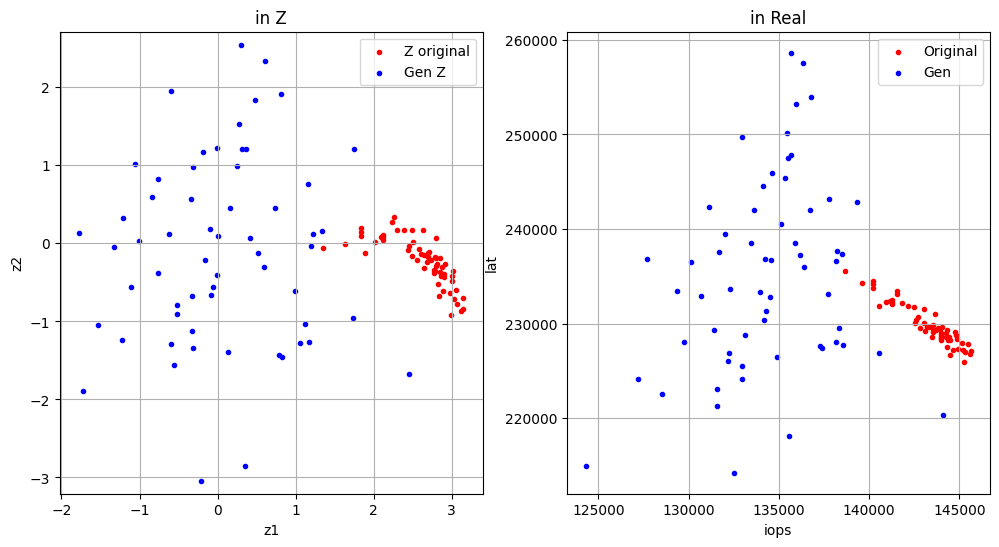

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [102]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [103]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 7.8153 +- 0.6519
Kolmogorov-Smirnov       = 0.6639 +- 0.0250
Cramer-von Mises         = 5.5688 +- 0.1843
Anderson-Darling         = 35.2153 +- 1.1030
ROC AUC                  = 0.7738 +- 0.0193
Kullback-Leibler KDE     = 1.8782 +- 0.3669
Jensen-Shannon KDE       = 0.3216 +- 0.0185
Maximum Mean Discrepancy = 0.8068 +- 0.0401


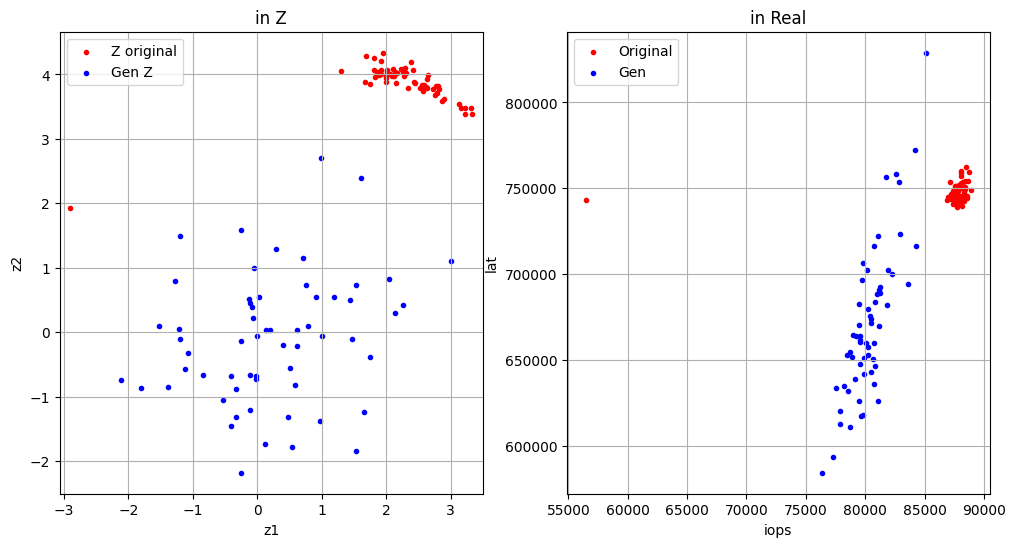

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [105]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [106]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 20.7768 +- 1.5066
Kolmogorov-Smirnov       = 0.9392 +- 0.0241
Cramer-von Mises         = 9.0609 +- 0.4302
Anderson-Darling         = 55.3045 +- 2.3181
ROC AUC                  = 0.9725 +- 0.0122
Kullback-Leibler KDE     = 4.3214 +- 0.8375
Jensen-Shannon KDE       = 0.5262 +- 0.0221
Maximum Mean Discrepancy = 1.0714 +- 0.0593


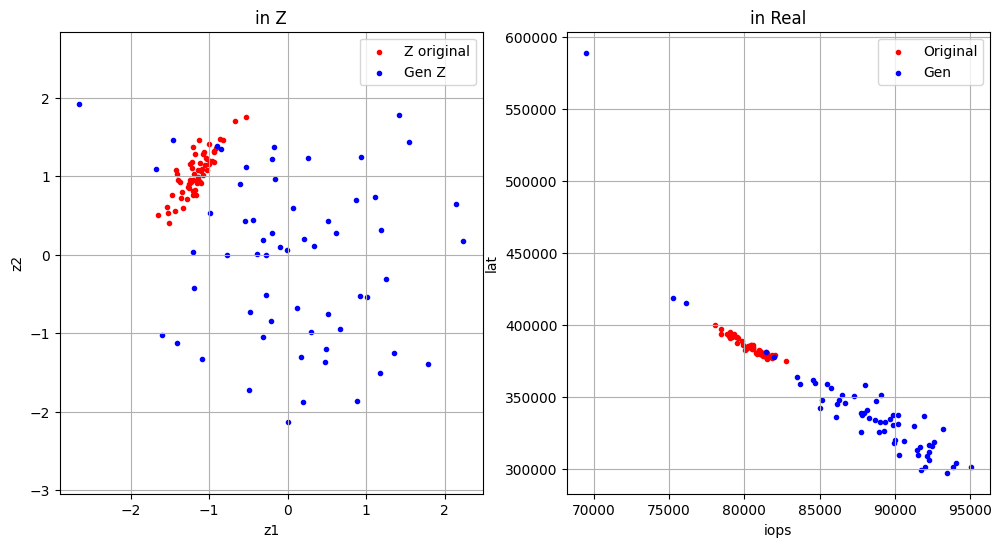

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [108]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [109]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 4.0107 +- 0.4450
Kolmogorov-Smirnov       = 0.7461 +- 0.0446
Cramer-von Mises         = 5.5582 +- 0.6690
Anderson-Darling         = 33.0433 +- 4.1434
ROC AUC                  = 0.8458 +- 0.0300
Kullback-Leibler KDE     = 0.8751 +- 0.1039
Jensen-Shannon KDE       = 0.2385 +- 0.0232
Maximum Mean Discrepancy = 0.5897 +- 0.0531


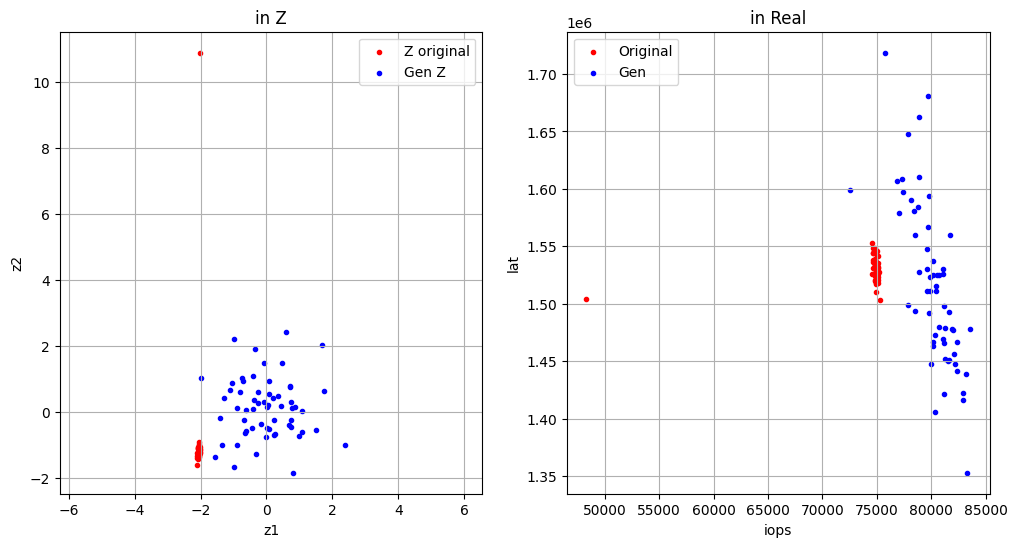

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [111]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [112]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 7.2991 +- 0.8458
Kolmogorov-Smirnov       = 0.9477 +- 0.0231
Cramer-von Mises         = 8.8403 +- 0.5170
Anderson-Darling         = 53.4615 +- 2.9075
ROC AUC                  = 0.9621 +- 0.0164
Kullback-Leibler KDE     = 1.8636 +- 0.1813
Jensen-Shannon KDE       = 0.3960 +- 0.0234
Maximum Mean Discrepancy = 0.8609 +- 0.0681


## Final experiments without outliers

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from probaforms.models import RealNVP
from probaforms import metrics

In [198]:
train = new_train
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
# y_test_ss = scaler.transform(test[['iops', 'lat']].values)
stscaler = StandardScaler()
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
# X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

model = RealNVP(lr=0.001, n_layers=12, n_epochs=200, batch_size=64) # 200
model.fit(y_tr_ss, X_tr_ss) # (target, condition)

In [199]:
def calc_metrics(X, Y):
    mu, sigma = metrics.frechet_distance(X, Y)
    print(r"Frechet Distance         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kolmogorov_smirnov_1d(X, Y)
    print(r"Kolmogorov-Smirnov       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.cramer_von_mises_1d(X, Y)
    print(r"Cramer-von Mises         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.anderson_darling_1d(X, Y)
    print(r"Anderson-Darling         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.roc_auc_score_1d(X, Y)
    print(r"ROC AUC                  = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kullback_leibler_1d_kde(X, Y)
    print(r"Kullback-Leibler KDE     = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.jensen_shannon_1d_kde(X, Y)
    print(r"Jensen-Shannon KDE       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.maximum_mean_discrepancy(X, Y)
    print(r"Maximum Mean Discrepancy = %.4f +- %.4f" % (mu, sigma))

### RESULTS (TRAIN)

In [200]:
from torch.utils.data import TensorDataset, DataLoader

In [201]:
ids = ['hse-09132022-234723-z24647-read', 'hse-09132022-155203-z5570-read',
       'hse-09132022-234723-z24647-write', 'hse-09132022-155203-z5570-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_train = torch.tensor(train[train['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_train[:, 0])
    total_lat.append(y_train[:, 1])
    X_train = torch.tensor(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_train_ss = scaler.transform(y_train)
    X_train_ss = stscaler.transform(X_train)
    y_tst = torch.tensor(y_train_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_train_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    y_gen = model.sample(stscaler.transform(X_train.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

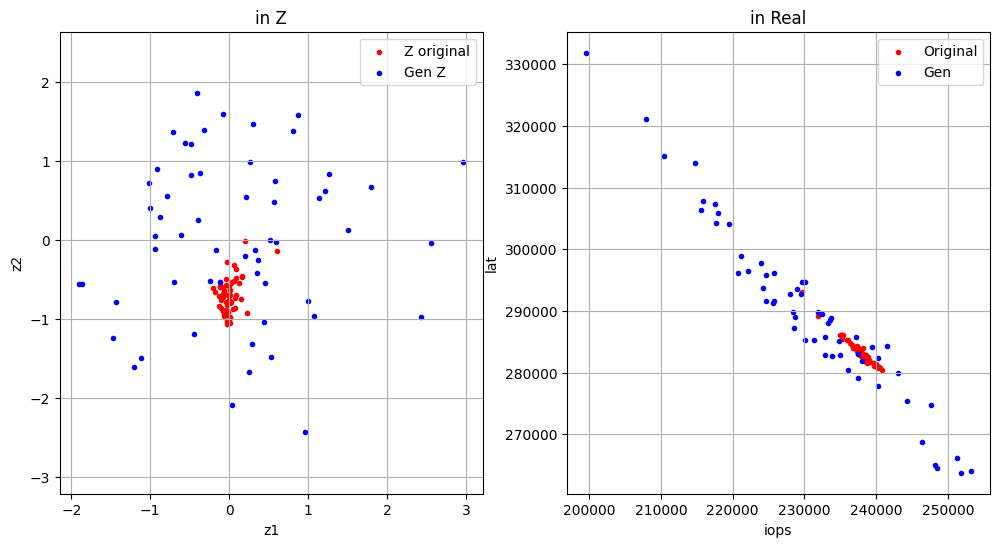

In [202]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [203]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [204]:
print('In Z:')
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In Z:
Frechet Distance         = 2.0096 +- 0.2652
Kolmogorov-Smirnov       = 0.5543 +- 0.0365
Cramer-von Mises         = 2.7976 +- 0.3646
Anderson-Darling         = 19.3241 +- 2.5545
ROC AUC                  = 0.6569 +- 0.0337
Kullback-Leibler KDE     = 0.4794 +- 0.0604
Jensen-Shannon KDE       = 0.1383 +- 0.0191
Maximum Mean Discrepancy = 0.3868 +- 0.0380


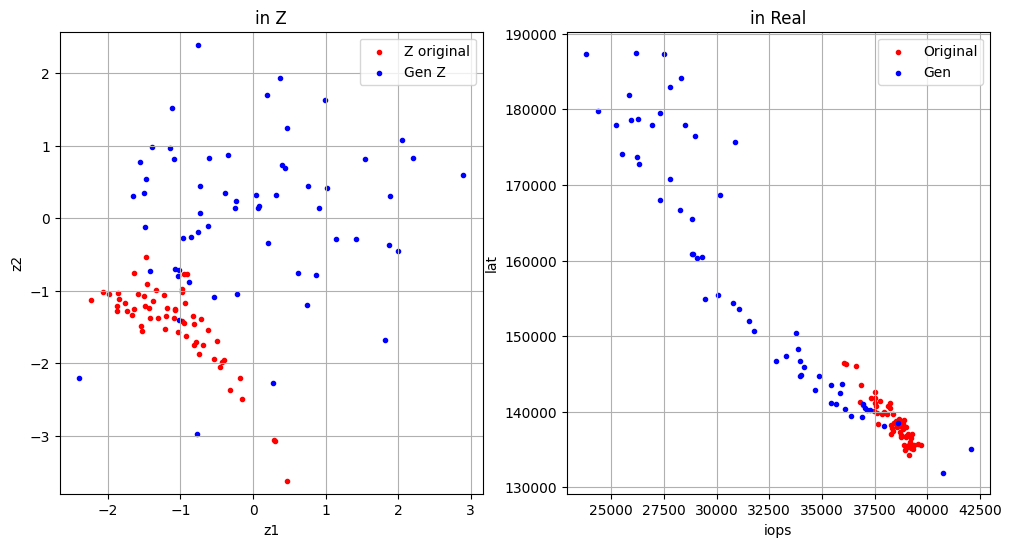

In [205]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [206]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [207]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 4.4347 +- 0.4787
Kolmogorov-Smirnov       = 0.6421 +- 0.0424
Cramer-von Mises         = 4.8737 +- 0.5999
Anderson-Darling         = 29.6122 +- 3.8880
ROC AUC                  = 0.8474 +- 0.0247
Kullback-Leibler KDE     = 0.8449 +- 0.1090
Jensen-Shannon KDE       = 0.2183 +- 0.0240
Maximum Mean Discrepancy = 0.4975 +- 0.0557


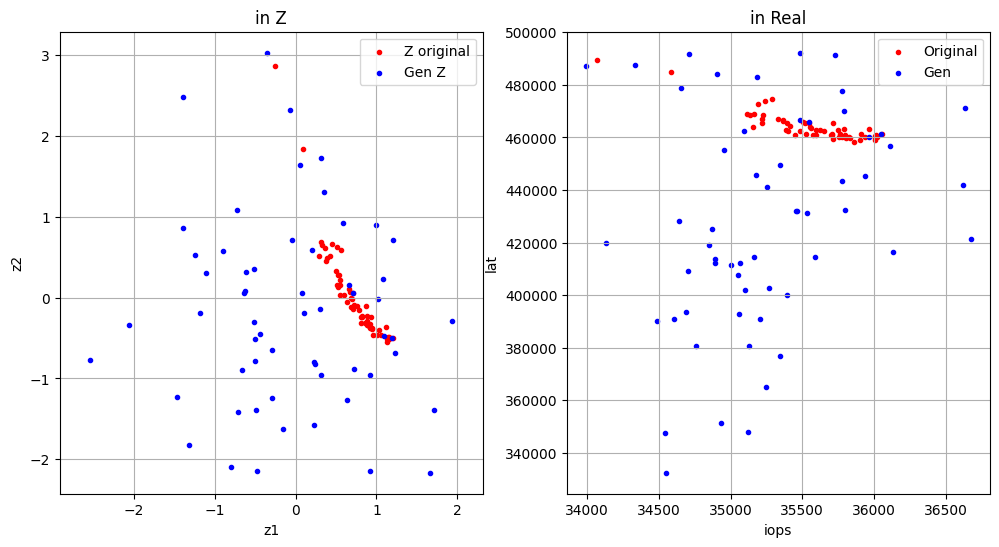

In [208]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [209]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [210]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.7651 +- 0.3254
Kolmogorov-Smirnov       = 0.5191 +- 0.0429
Cramer-von Mises         = 2.2329 +- 0.4544
Anderson-Darling         = 14.9011 +- 2.6834
ROC AUC                  = 0.6772 +- 0.0331
Kullback-Leibler KDE     = 0.4099 +- 0.0708
Jensen-Shannon KDE       = 0.1159 +- 0.0190
Maximum Mean Discrepancy = 0.2796 +- 0.0454


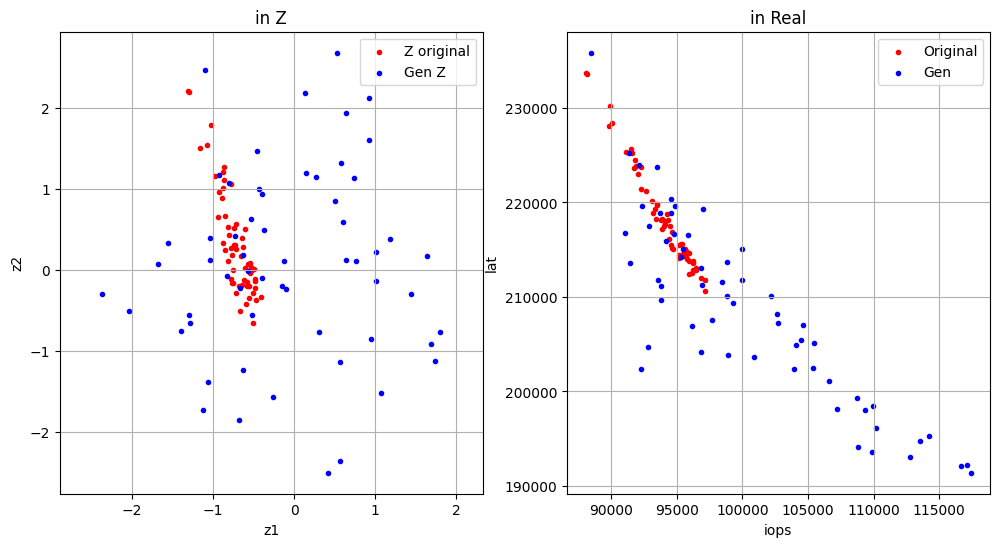

In [211]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [212]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [213]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.5977 +- 0.2377
Kolmogorov-Smirnov       = 0.4531 +- 0.0397
Cramer-von Mises         = 1.7438 +- 0.3704
Anderson-Darling         = 11.7984 +- 2.4503
ROC AUC                  = 0.6488 +- 0.0313
Kullback-Leibler KDE     = 0.3313 +- 0.0659
Jensen-Shannon KDE       = 0.1016 +- 0.0151
Maximum Mean Discrepancy = 0.2146 +- 0.0408


### RESULTS (TEST)

In [214]:
from torch.utils.data import TensorDataset, DataLoader

In [215]:
test = new_test

In [216]:
ids = ['hse-09132022-203942-z36542-read', 'hse-09132022-192053-z87989-read',
       'hse-09132022-203942-z36542-write', 'hse-09132022-192053-z87989-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_test = torch.tensor(test[test['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_test[:, 0])
    total_lat.append(y_test[:, 1])
    X_test = torch.tensor(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_test_ss = scaler.transform(y_test)
    X_test_ss = stscaler.transform(X_test)
    y_tst = torch.tensor(y_test_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_test_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    y_gen = model.sample(stscaler.transform(X_test.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

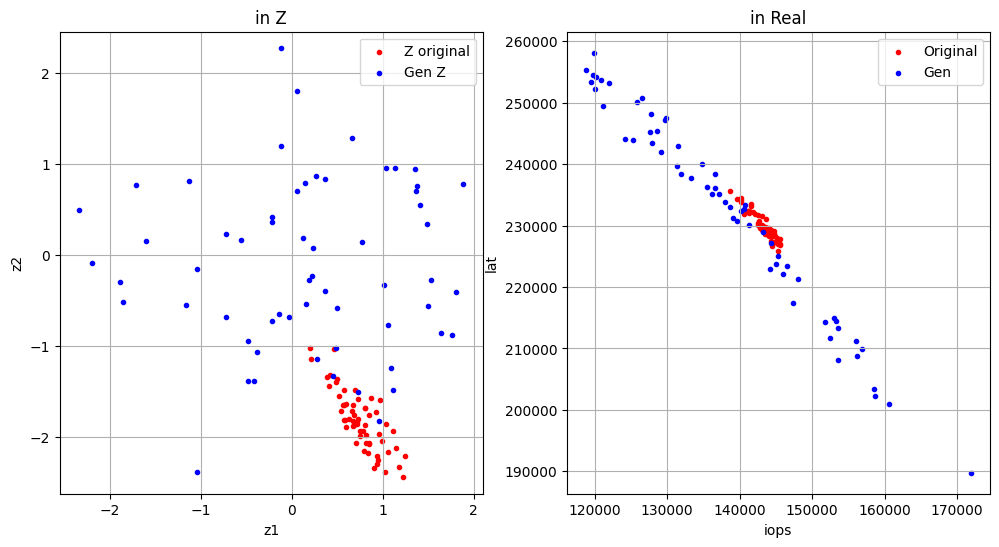

In [217]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [218]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [219]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 4.4359 +- 0.4934
Kolmogorov-Smirnov       = 0.7150 +- 0.0472
Cramer-von Mises         = 5.6397 +- 0.4808
Anderson-Darling         = 35.9368 +- 2.8472
ROC AUC                  = 0.8213 +- 0.0313
Kullback-Leibler KDE     = 1.0051 +- 0.1350
Jensen-Shannon KDE       = 0.2433 +- 0.0212
Maximum Mean Discrepancy = 0.6164 +- 0.0543


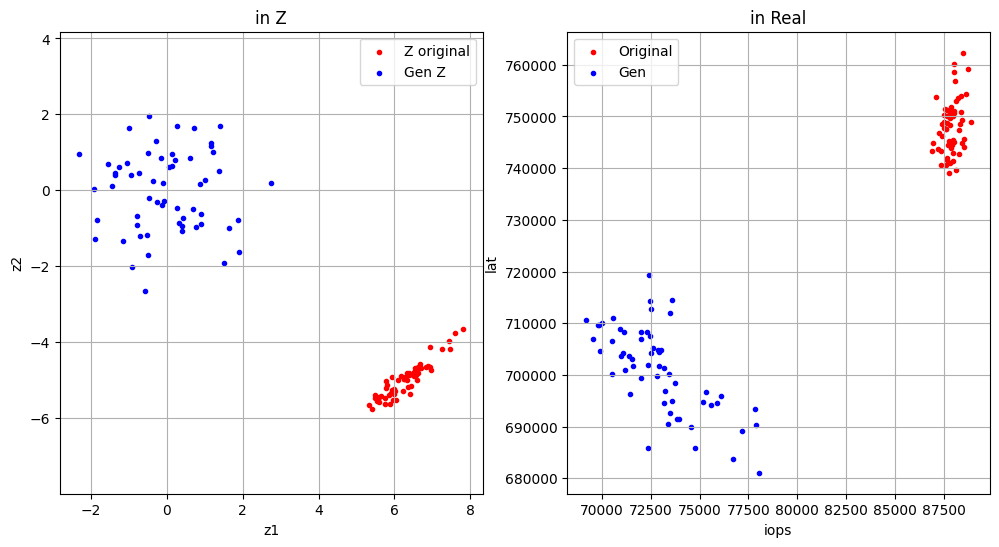

In [220]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [221]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [222]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 65.7947 +- 2.3339
Kolmogorov-Smirnov       = 1.0000 +- 0.0000
Cramer-von Mises         = 9.8403 +- 0.0011
Anderson-Darling         = 60.3491 +- 0.0938
ROC AUC                  = 1.0000 +- 0.0000
Kullback-Leibler KDE     = 12.2089 +- 0.2536
Jensen-Shannon KDE       = 0.6883 +- 0.0028
Maximum Mean Discrepancy = 1.3193 +- 0.0411


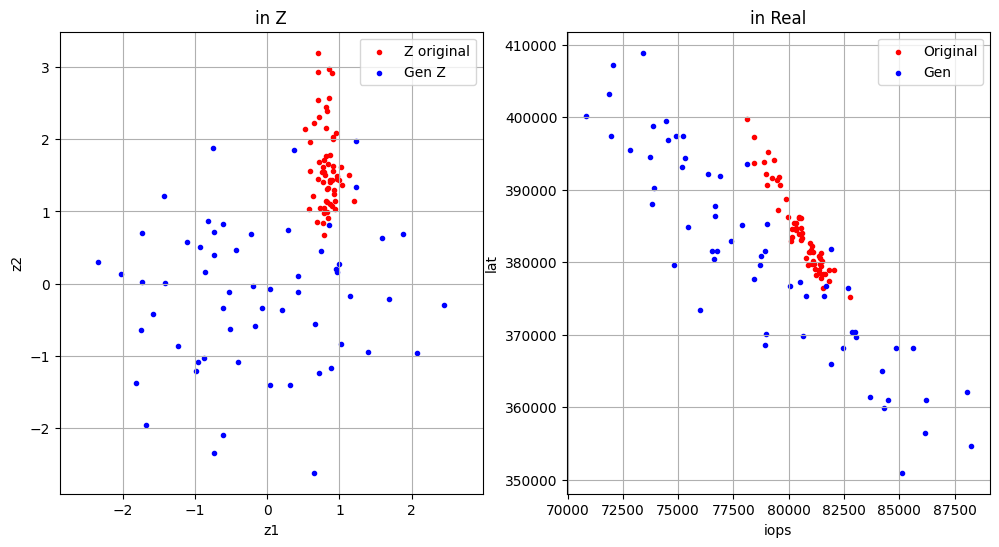

In [223]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [224]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [225]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 5.2052 +- 0.6282
Kolmogorov-Smirnov       = 0.7853 +- 0.0377
Cramer-von Mises         = 6.0536 +- 0.6056
Anderson-Darling         = 37.6549 +- 3.6835
ROC AUC                  = 0.8512 +- 0.0285
Kullback-Leibler KDE     = 1.1794 +- 0.2053
Jensen-Shannon KDE       = 0.2804 +- 0.0267
Maximum Mean Discrepancy = 0.6028 +- 0.0512


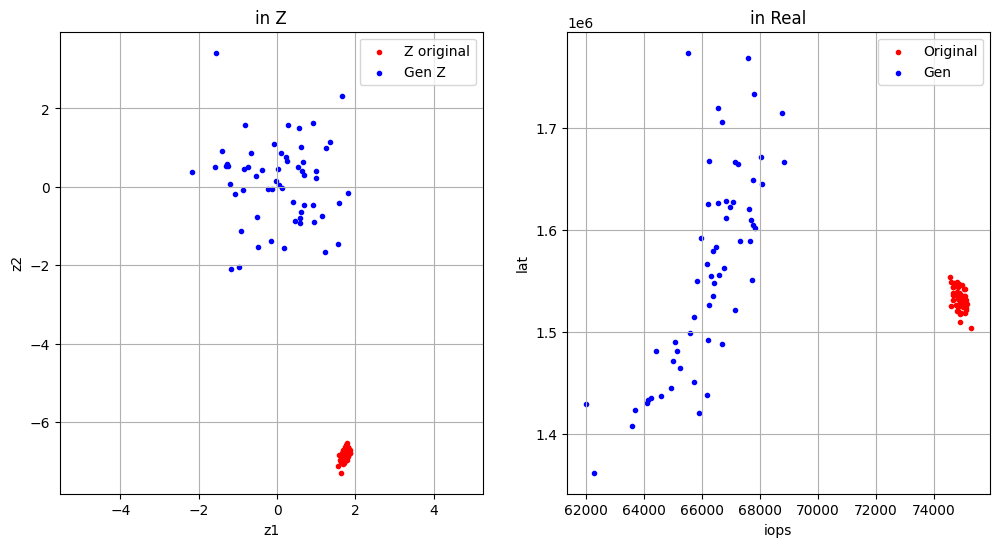

In [226]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [227]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [228]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 53.0276 +- 2.1009
Kolmogorov-Smirnov       = 0.9794 +- 0.0129
Cramer-von Mises         = 9.5093 +- 0.2713
Anderson-Darling         = 57.9618 +- 1.8663
ROC AUC                  = 0.9899 +- 0.0073
Kullback-Leibler KDE     = 7.5523 +- 0.1030
Jensen-Shannon KDE       = 0.5364 +- 0.0148
Maximum Mean Discrepancy = 1.2056 +- 0.0609


'hse-09132022-180712-z63065-read'

## aaa

это код когда я просто проверяла модельку, запускать не нада

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_new[0], y_new[1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

In [ ]:
results1 = []
results2 = []
results3 = []
numb = 10 # 10

for i in range(numb):
  print(i)
  ids = pd.unique(train[['id']]. values.ravel())
  id1 = np.array([np.random.sample() for k in range(len(ids))])
  ar = []
  for j in range(len(ids)):
    if id1[j] <= 0.7:
      ar.append(ids[j])
  train = train.loc[train['id'].isin(ar)]
  scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
  y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
  y_test_ss = scaler.transform(test[['iops', 'lat']].values)
  stscaler = StandardScaler()
  X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  # model
  model = RealNVP(lr=0.001, n_layers=24, n_epochs=200, batch_size=64) # 200
  model.fit(y_tr_ss, X_tr_ss) # (target, condition)
  # samples 1
  y_test = torch.tensor(test[test['id'] == 'hse-09132022-180712-z63065'][['iops', 'lat']].values)
  X_test = torch.tensor(test[test['id'] == 'hse-09132022-180712-z63065'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  y_gen = model.sample(stscaler.transform(X_test.clone().detach()))
  y_gen = scaler.inverse_transform(y_gen)
  if i == 0:
    results1.append(y_test)
  results1.append(y_gen)
  # samples 2
  y_test_2 = torch.tensor(test[test['id'] == 'hse-09132022-203942-z36542'][['iops', 'lat']].values)
  X_test_2 = torch.tensor(test[test['id'] == 'hse-09132022-203942-z36542'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  y_gen_2 = model.sample(stscaler.transform(X_test_2.clone().detach()))
  y_gen_2 = scaler.inverse_transform(y_gen_2)
  if i == 0:
    results2.append(y_test_2)
  results2.append(y_gen_2)
  # samples 3
  y_test_3 = torch.tensor(test[test['id'] == 'hse-09132022-192053-z87989'][['iops', 'lat']].values)
  X_test_3 = torch.tensor(test[test['id'] == 'hse-09132022-192053-z87989'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  y_gen_3 = model.sample(stscaler.transform(X_test_3.clone().detach()))
  y_gen_3 = scaler.inverse_transform(y_gen_3)
  if i == 0:
    results3.append(y_test_3)
  results3.append(y_gen_3)

0


<ipython-input-20-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


1


<ipython-input-20-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


2


<ipython-input-20-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


3


<ipython-input-20-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


In [ ]:
colors = np.array(["blue","red","green","yellow","pink","black","orange","purple","brown","cyan","magenta"])

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(results1[0][:, 0], results1[0][:, 1], marker='.', label='Observations', color=colors[0], linewidth=1)
for i in range(1, numb+1):
  plt.scatter(results1[i][:, 0], results1[i][:, 1], marker='.', label='Generated with NF', color=colors[i], linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(results2[0][:, 0], results2[0][:, 1], marker='.', label='Observations', color=colors[0], linewidth=1)
for i in range(1, numb+1):
  plt.scatter(results2[i][:, 0], results2[i][:, 1], marker='.', label='Generated with NF', color=colors[i], linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(results3[0][:, 0], results3[0][:, 1], marker='.', label='Observations', color=colors[0], linewidth=1)
for i in range(1, numb+1):
  plt.scatter(results3[i][:, 0], results3[i][:, 1], marker='.', label='Generated with NF', color=colors[i], linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()